# Proyek Pertama : Membuat Model NLP dengan TensorFlow

- Nama : Ilyasa Nanda Rahmadianto
- Username : [ilyasanara16](https://www.dicoding.com/users/ilyasanara16/academies)
### Berikut kriteria submission yang harus Anda penuhi:
1. Dataset yang akan dipakai bebas, namun minimal memiliki 1000 sampel.

2. Harus menggunakan LSTM dalam arsitektur model.

3. Harus menggunakan model sequential.

4. Validation set sebesar 20% dari total dataset.

5. Harus menggunakan Embedding.

6. Harus menggunakan fungsi tokenizer.

7. Akurasi dari model minimal 75% pada train set dan validation set.

Klik link untuk mengunduh [Dataset](https://www.kaggle.com/datasets/yufengdev/bbc-fulltext-and-category/data)


In [76]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [77]:
# text processing
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
import re

# utils
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [78]:
df = pd.read_csv("C:/Users/ASUS/Downloads/TUGASKU/Dicoding/Lintasarta/Project1-MembuatModelNLPdenganTensorFlow/bbc-text.csv")
df.head()
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [79]:
df.category.unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [80]:
df.isna().sum()

category    0
text        0
dtype: int64

In [81]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


<Axes: xlabel='count', ylabel='category'>

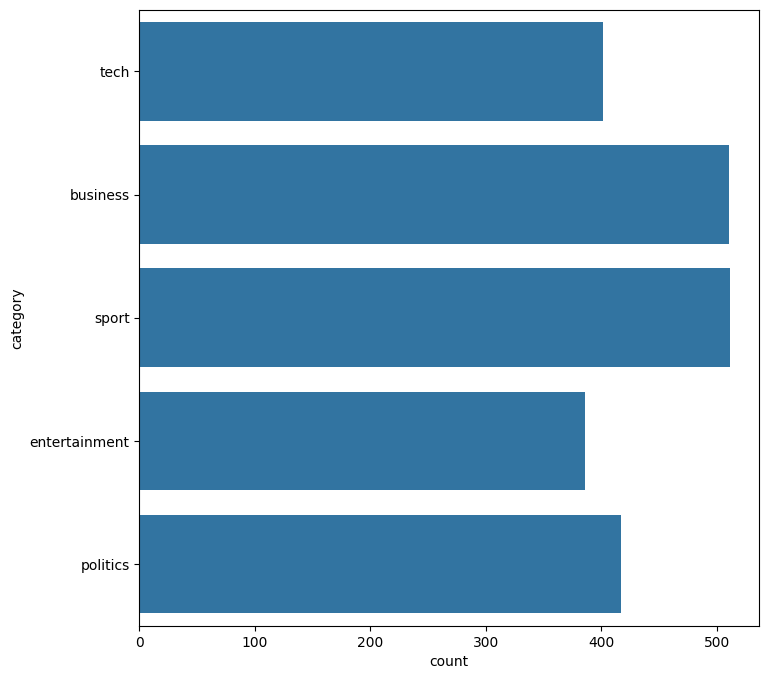

In [82]:
plt.figure(figsize = (8, 8))
sns.countplot(df['category'])

In [83]:
category = pd.get_dummies(df.category)
df_new = pd.concat([df, category], axis = 1)
df_new = df_new.drop(columns = 'category')

df_new

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,False,False,False,False,True
1,worldcom boss left books alone former worldc...,True,False,False,False,False
2,tigers wary of farrell gamble leicester say ...,False,False,False,True,False
3,yeading face newcastle in fa cup premiership s...,False,False,False,True,False
4,ocean s twelve raids box office ocean s twelve...,False,True,False,False,False
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,True,False,False,False,False
2221,kilroy unveils immigration policy ex-chatshow ...,False,False,True,False,False
2222,rem announce new glasgow concert us band rem h...,False,True,False,False,False
2223,how political squabbles snowball it s become c...,False,False,True,False,False


In [84]:
df_baru = df_new.replace({True: 1, False: 0})
df_baru

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


In [85]:
def remove_Stopwords(text ):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize( text.lower() )
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)


def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer()
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist)

def clean_text(text):
    delete_dict = {sp_character: '' for sp_character in string.punctuation}
    delete_dict[' '] = ' '
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    # Remove words starting with \
    text1 = re.sub(r'\\\w*', '', text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr])

    return text2.lower()

#code untuk menghilangkan hastag, link, mention
def cleanText(text):
    text = text.lower()
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'pic.twitter.com', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'^\s+|\s+?$', '', text)
    text = text.strip()
    return text

def stemSentence(text):
    porter = PorterStemmer()
    token_words=word_tokenize(text)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [86]:
df_baru['new_text'] = df_baru['text'].apply(clean_text)
df_baru['new_text'] = df_baru['new_text'].apply(remove_Stopwords)
df_baru['new_text'] = df_baru['new_text'].apply(lemmatize_text)
df_baru['stem_teks'] = df_baru['new_text'].apply(stemSentence)
df_baru['clean_teks'] = df_baru['new_text'].apply(cleanText)

df_baru

,text,business,entertainment,politics,sport,tech,new_text,stem_teks,clean_teks
0,tv future in the hands of viewers with home th...,0,0,0,0,1,tv future hand viewer home theatre system plas...,tv futur hand viewer home theatr system plasma...,tv future hand viewer home theatre system plas...
1,worldcom boss left books alone former worldc...,1,0,0,0,0,worldcom bos left book alone former worldcom b...,worldcom bo left book alon former worldcom bo ...,worldcom bos left book alone former worldcom b...
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0,tiger wary farrell gamble leicester say rushed...,tiger wari farrel gambl leicest say rush make ...,tiger wary farrell gamble leicester say rushed...
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0,yeading face newcastle fa cup premiership side...,yead face newcastl fa cup premiership side new...,yeading face newcastle fa cup premiership side...
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0,ocean twelve raid box office ocean twelve crim...,ocean twelv raid box offic ocean twelv crime c...,ocean twelve raid box office ocean twelve crim...
...,...,...,...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0,car pull u retail figure u retail sale fell 03...,car pull u retail figur u retail sale fell 03 ...,car pull u retail figure u retail sale fell ja...
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0,kilroy unveils immigration policy exchatshow h...,kilroy unveil immigr polici exchatshow host ro...,kilroy unveils immigration policy exchatshow h...
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0,rem announce new glasgow concert u band rem an...,rem announc new glasgow concert u band rem ann...,rem announce new glasgow concert u band rem an...
2223,how political squabbles snowball it s become c...,0,0,1,0,0,political squabble snowball become commonplace...,polit squabbl snowbal becom commonplac argu bl...,political squabble snowball become commonplace...


In [87]:
df_baru.text[0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [88]:
df_baru.new_text[0]

'tv future hand viewer home theatre system plasma highdefinition tv digital video recorder moving living room way people watch tv radically different five year time according expert panel gathered annual consumer electronics show la vega discus new technology impact one favourite pastime u leading trend programme content delivered viewer via home network cable satellite telecom company broadband service provider front room portable device one talkedabout technology ce digital personal video recorder dvr pvr settop box like u tivo uk sky system allow people record store play pause forward wind tv programme want essentially technology allows much personalised tv also builtin highdefinition tv set big business japan u slower take europe lack highdefinition programming people forward wind advert also forget abiding network channel schedule putting together alacarte entertainment u network cable satellite company worried mean term advertising revenue well brand identity viewer loyalty chann

In [89]:
df_baru.stem_teks[0]

'tv futur hand viewer home theatr system plasma highdefinit tv digit video record move live room way peopl watch tv radic differ five year time accord expert panel gather annual consum electron show la vega discu new technolog impact one favourit pastim u lead trend programm content deliv viewer via home network cabl satellit telecom compani broadband servic provid front room portabl devic one talkedabout technolog ce digit person video record dvr pvr settop box like u tivo uk sky system allow peopl record store play paus forward wind tv programm want essenti technolog allow much personalis tv also builtin highdefinit tv set big busi japan u slower take europ lack highdefinit program peopl forward wind advert also forget abid network channel schedul put togeth alacart entertain u network cabl satellit compani worri mean term advertis revenu well brand ident viewer loyalti channel although u lead technolog moment also concern rais europ particularli grow uptak servic like sky happen tod

In [90]:
df_baru.clean_teks[0]

'tv future hand viewer home theatre system plasma highdefinition tv digital video recorder moving living room way people watch tv radically different five year time according expert panel gathered annual consumer electronics show la vega discus new technology impact one favourite pastime u leading trend programme content delivered viewer via home network cable satellite telecom company broadband service provider front room portable device one talkedabout technology ce digital personal video recorder dvr pvr settop box like u tivo uk sky system allow people record store play pause forward wind tv programme want essentially technology allows much personalised tv also builtin highdefinition tv set big business japan u slower take europe lack highdefinition programming people forward wind advert also forget abiding network channel schedule putting together alacarte entertainment u network cable satellite company worried mean term advertising revenue well brand identity viewer loyalty chann

In [91]:
length = df_baru['clean_teks'].str.len().max()
length, df_baru.columns

(15827,
 Index(['text', 'business', 'entertainment', 'politics', 'sport', 'tech',
        'new_text', 'stem_teks', 'clean_teks'],
       dtype='object'))

In [92]:
teks = df_baru['clean_teks'].values
label = df_baru[['tech', 'business', 'sport', 'entertainment', 'politics']].values
label, teks

(array([[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        ...,
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0]], dtype=int64),
 array(['tv future hand viewer home theatre system plasma highdefinition tv digital video recorder moving living room way people watch tv radically different five year time according expert panel gathered annual consumer electronics show la vega discus new technology impact one favourite pastime u leading trend programme content delivered viewer via home network cable satellite telecom company broadband service provider front room portable device one talkedabout technology ce digital personal video recorder dvr pvr settop box like u tivo uk sky system allow people record store play pause forward wind tv programme want essentially technology allows much personalised tv also builtin highdefinition tv set big business japan u slower take europe lack highdefinition programming people forward wind advert also forget

In [93]:
teks_train, teks_test, label_train, label_test = train_test_split(teks, label, test_size = 0.2)

In [94]:
tokenizer = Tokenizer(num_words = 10000, oov_token = '<OOV>')
# tokenizer = Tokenizer(num_words = 5000, oov_token = 'x')
tokenizer.fit_on_texts(teks_train)
tokenizer.fit_on_texts(teks_test)

In [95]:
sequences_train = tokenizer.texts_to_sequences(teks_train)
sequences_test = tokenizer.texts_to_sequences(teks_test)

In [96]:
# maxlen = max(len(sequence) for sequence in sequences_train)
maxlen = int(sum(len(sequence) for sequence in sequences_train) / len(sequences_train))
# maxlen = int(np.percentile([len(sequence) for sequence in sequences_train], 90))
maxlen

212

In [97]:
padded_train = pad_sequences(sequences=sequences_train,
                             maxlen = maxlen,
                             padding = 'post',
                             truncating = 'post')
padded_test = pad_sequences(sequences=sequences_test,
                            maxlen = maxlen,
                            padding = 'post',
                            truncating = 'post')

padded_train

array([[  51, 1121, 8457, ...,  116, 1025, 1317],
       [7634,  582, 9519, ...,    0,    0,    0],
       [   1,  334,   47, ...,    0,    0,    0],
       ...,
       [ 767,   12, 2484, ...,    0,    0,    0],
       [3778, 6806,  422, ...,    0,    0,    0],
       [ 889,    1,  889, ..., 2986,  164, 1891]])

In [98]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=256, input_length=maxlen),
    tf.keras.layers.LSTM(512),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(254, activation='relu'),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(input_dim=10000, output_dim=256, input_length=maxlen),
#     tf.keras.layers.LSTM(512),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(254, activation='relu'),
#     tf.keras.layers.Dropout(0.3),
#     tf.keras.layers.Dense(128, activation= 'relu'),
#     tf.keras.layers.Dense(5, activation='softmax')
# ])

# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(input_dim=10000, output_dim=256, input_length=maxlen),
#     tf.keras.layers.LSTM(512),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.3),
#     tf.keras.layers.Dense(64, activation= 'relu'),
#     tf.keras.layers.Dense(5, activation='softmax')
# ])

#compile
model.compile(loss ='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [99]:
#cek model

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 212, 256)          2560000   
                                                                 
 lstm_7 (LSTM)               (None, 512)               1574912   
                                                                 
 dense_20 (Dense)            (None, 512)               262656    
                                                                 
 dense_21 (Dense)            (None, 254)               130302    
                                                                 
 dense_22 (Dense)            (None, 128)               32640     
                                                                 
 dense_23 (Dense)            (None, 5)                 645       
                                                                 
Total params: 4561155 (17.40 MB)
Trainable params: 456

In [100]:
#Callback Function
class accCallback(Callback):
   def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.98 and logs.get('val_accuracy') >= 0.98):
            print("\nAccuracy and Val_Accuracy has reached 98%!", "\nEpoch: ", epoch)
            self.model.stop_training = True

callbacks = accCallback()

auto_reduction_LR = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    patience = 2, #setelah 2 epoch, jika tidak ada kenaikan maka LR berkurang
    verbose = 1,
    factor = 0.2,
    min_lr = 0.000003
)

auto_stop_learn = EarlyStopping(
    monitor = 'val_accuracy',
    min_delta = 0,
    patience = 4,
    verbose = 1,
    mode = 'auto'
)

#latih model
history = model.fit(padded_train, label_train,
                    epochs = 100,
                    batch_size=128,
                    steps_per_epoch = 30,
                    validation_data = (padded_test, label_test),
                    verbose = 1,
                    callbacks=[callbacks, auto_reduction_LR, auto_stop_learn],
                    )

Epoch 1/100
30/30 [==============================] - 80s 3s/step - loss: 1.5413 - accuracy: 0.2835 - val_loss: 1.4413 - val_accuracy: 0.3483 - lr: 0.0010
Epoch 2/100
30/30 [==============================] - 80s 3s/step - loss: 1.2522 - accuracy: 0.3999 - val_loss: 1.2460 - val_accuracy: 0.4247 - lr: 0.0010
Epoch 3/100
30/30 [==============================] - 81s 3s/step - loss: 1.1761 - accuracy: 0.4416 - val_loss: 1.3004 - val_accuracy: 0.4607 - lr: 0.0010
Epoch 4/100
30/30 [==============================] - 82s 3s/step - loss: 0.9951 - accuracy: 0.5210 - val_loss: 1.1426 - val_accuracy: 0.4539 - lr: 0.0010
Epoch 5/100
30/30 [==============================] - 80s 3s/step - loss: 1.0598 - accuracy: 0.5086 - val_loss: 1.2565 - val_accuracy: 0.5056 - lr: 0.0010
Epoch 6/100
30/30 [==============================] - 80s 3s/step - loss: 0.9629 - accuracy: 0.5613 - val_loss: 1.4092 - val_accuracy: 0.4854 - lr: 0.0010
Epoch 7/100
30/30 [==============================] - ETA: 0s - loss: 1.0031 

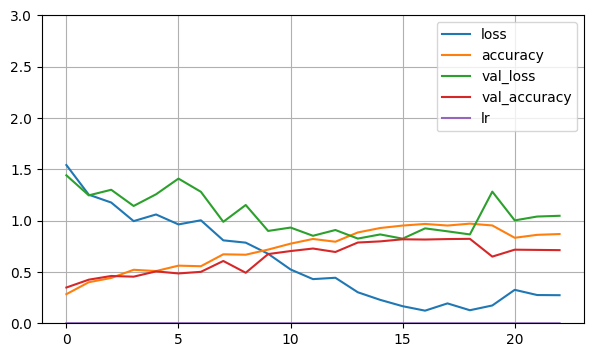

In [101]:
  #plotting

pd.DataFrame(history.history).plot(figsize=(7, 4))
plt.grid(True)
plt.gca().set_ylim(0,3) #sumbu y

plt.show()

In [102]:
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(padded_train, label_train)

Counter(np.argmax(y_res, axis = 1))

Counter({4: 409, 3: 409, 2: 409, 0: 409, 1: 409})

In [103]:
#compile
model.compile(loss ='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [104]:
new_history = model.fit(X_res, y_res,
                         batch_size = 128,
                    steps_per_epoch = 30,
                    epochs = 100,
                    validation_data = (padded_test, label_test),
                    verbose = 1,
                    callbacks=[callbacks, auto_reduction_LR, auto_stop_learn],
                    )

Epoch 1/100
30/30 [==============================] - 83s 3s/step - loss: 0.9516 - accuracy: 0.6706 - val_loss: 0.6578 - val_accuracy: 0.7843 - lr: 0.0010
Epoch 2/100
30/30 [==============================] - 80s 3s/step - loss: 0.4485 - accuracy: 0.8576 - val_loss: 0.5236 - val_accuracy: 0.8270 - lr: 0.0010
Epoch 3/100
30/30 [==============================] - 82s 3s/step - loss: 0.3873 - accuracy: 0.8607 - val_loss: 0.6415 - val_accuracy: 0.8112 - lr: 0.0010
Epoch 4/100
30/30 [==============================] - ETA: 0s - loss: 0.2477 - accuracy: 0.9228
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
30/30 [==============================] - 82s 3s/step - loss: 0.2477 - accuracy: 0.9228 - val_loss: 0.7883 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 5/100
30/30 [==============================] - 82s 3s/step - loss: 0.2585 - accuracy: 0.9231 - val_loss: 0.5896 - val_accuracy: 0.8315 - lr: 2.0000e-04
Epoch 6/100
30/30 [==============================] - 82s 3s/step -

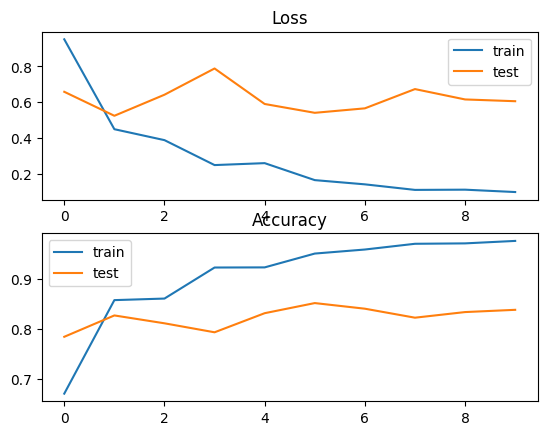

In [105]:
# plot loss
plt.subplot(211)
plt.title('Loss')
plt.plot(new_history.history['loss'], label='train')
plt.plot(new_history.history['val_loss'], label='test')
plt.legend()

# plot accuracy
plt.subplot(212)
plt.title('Accuracy')
plt.plot(new_history.history['accuracy'], label='train')
plt.plot(new_history.history['val_accuracy'], label='test')
plt.legend()
plt.show()


In [106]:
# sanity check
sentence = ["'trend new yorker encount empti supermarket shelf pictur wegman brooklyn soldout onlin grocer foodkick maxdeliveri coronavirusfear shopper stock httpstcogr76pcrlwh httpstcoivmkmsqdt1'"]
sequence = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequence, maxlen=maxlen, padding='post', truncating='post')
pred = model.predict(padded)
pred

1/1 [==============================] - 0s 455ms/step


array([[3.6834263e-05, 3.7295634e-03, 1.2167635e-01, 8.7103719e-01,
        3.5200315e-03]], dtype=float32)

In [107]:
# sanity check actual vs prediction
y_pred = model.predict(padded_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(label_test, axis = 1)

class_names = ['tech', 'business', 'sport', 'entertainment', 'politics']
actual = [class_names[i] for i in y_test]
prediction = [class_names[i] for i in y_pred]

# # data frame actual vs prediction include text
df_pred = pd.DataFrame({'actual': actual, 'prediction': prediction, 'text': teks_test})
df_pred

14/14 [==============================] - 4s 304ms/step


,actual,prediction,text
0,entertainment,entertainment,cult band kasabian surge forward indie dance b...
1,entertainment,tech,rapper film music video jail u rapper awaiting...
2,sport,sport,boro suffer morrison injury blow middlesbrough...
3,entertainment,entertainment,belle named best scottish band belle sebastian...
4,politics,politics,ready information act thousand public body ill...
...,...,...,...
440,tech,tech,price trusted pc security buy trusted computer...
441,business,business,wembley firm make profit share multiplex group...
442,tech,tech,u state act stop spammer u state texas filed l...
443,politics,politics,mcconnell drunk remark row scotland first mini...
